In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns

df = pd.read_csv("creditcardcsvpresent.csv")

In [2]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [3]:
df.head()


,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [4]:
del df['Transaction date']

In [5]:
df.describe()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


In [6]:
data_df = pd.read_csv("creditcardcsvpresent.csv")
print("Credit Card Fraud Detection data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Credit Card Fraud Detection data -  rows: 3075  columns: 12


Check Missing Data

In [7]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Transaction date,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
Total,3075.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\amaar\AppData\Local\Temp\ipykernel_6540\3580958359.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Average Amount/transaction/day'])


<Axes: xlabel='Average Amount/transaction/day', ylabel='Density'>

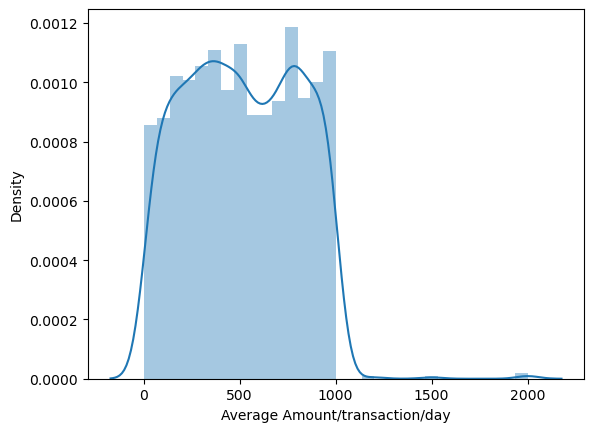

In [9]:
import seaborn as sns

sns.distplot(df['Average Amount/transaction/day'])

C:\Users\amaar\AppData\Local\Temp\ipykernel_6540\4191293682.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

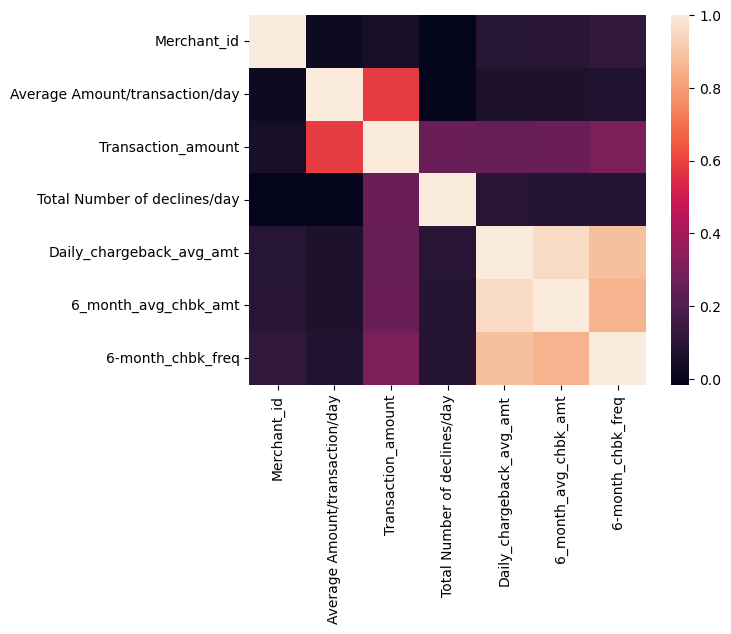

In [10]:
plt.figure()
sns.heatmap(df.corr())

### Train/Test Data Split

In [49]:
import matplotlib.pyplot as plt
Foreign = np.ma.masked_where(df['isForeignTransaction']==0, 
                     df['Transaction_amount'])
Non_Foreign = np.ma.masked_where(df['isForeignTransaction']==1, 
                     df['Transaction_amount'])

Transaction_amount = df['Transaction_amount']
plt.scatter(Transaction_amount, isForeignTransaction, c='red', marker='+')
plt.scatter(Transaction_amount, isForeignTransaction, c='blue', marker='^')

plt.xlabel('Transaction_amount')
plt.ylabel('isForeignTransaction')
plt.legend(['Transaction_amount', 'isForeignTransaction'])
plt.show()

NameError: name 'isForeignTransaction' is not defined

In [50]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, 
                        test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))



Train size:  2460 Test size:  615


### Train and evaluate a Linear Regression Model 

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import numpy as np

X = train_set[['Transaction_amount']]
y = train_set['Daily_chargeback_avg_amt']
X_test = test_set[['Transaction_amount']]
y_test = test_set['Daily_chargeback_avg_amt']


lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  3.8424431665192316
 Coefficients [0.00532156]
 Score 0.07023278537217126
MAE is  98.57969797140845
RMSE is  202.17750079997438
MSE is  40875.74182972364
R^2  0.07023278537217126

Results for linear regression on test data
MAE is  90.4731044730505
RMSE is  190.65827389126713
MSE is  36350.577403197436
R^2  0.030985534424948336


### Train and Evaluate a Pipelined Linear Regression Model

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

X = train_set[['Transaction_amount']]
y = train_set['Daily_chargeback_avg_amt']

X_test = test_set[['Transaction_amount']]
y_test = test_set['Daily_chargeback_avg_amt']


imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
poly4 = PolynomialFeatures(degree=4, include_bias=False)
scale = StandardScaler()

lr_model = LinearRegression()

stages = [('imp_mean', imp_mean),
          ('poly4', poly4),
          ('scale', scale),
          ('lr_model', lr_model),
         ]
pipe_model = Pipeline(stages)

pipe_model.fit(X,y)

y_pred = pipe_model.predict(X)
print('Results for pipeline linear regression on training data')
#print('  Default settings')
#print('Internal parameters:')
print('   Bias is ', pipe_model.predict([[0]]))
#print('   Coefficients', pipe_model.coef_)
print('   Score', pipe_model.score(X,y))

print('MAE is  ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2    ', r2_score(y,y_pred))

y_test_pred = pipe_model.predict(X_test)
print()
print('Results for pipeline linear regression on test data')

print('MAE is  ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test,y_test_pred))


Results for pipeline linear regression on training data
   Bias is  [25.75189617]
   Score 0.08094987097995787
MAE is   97.40045988314266
RMSE is  201.00891061961457
MSE is  40404.582148484194
R^2     0.08094987097995787

Results for pipeline linear regression on test data
MAE is   90.07477851063375
RMSE is  190.7932715965918
MSE is  36402.072486530844
R^2     0.029612805730639513


C:\Users\amaar\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


### Train and evaluate Decision Tree model 

Results for decision tree on training data
  Default settings
Confusion Matrix
[[2092    0]
 [   1  367]]
Accuracy is   0.9995934959349594
Precision is  0.9995936901557262
Recall is     0.9995934959349594
F1 is         0.9995932679683758

Results for decision tree on test data
  Default settings
Confusion Matrix
[[487  48]
 [ 46  34]]
Accuracy is   0.8471544715447155
Precision is  0.8487774371177107
Recall is     0.8471544715447155
F1 is         0.8479548486704176


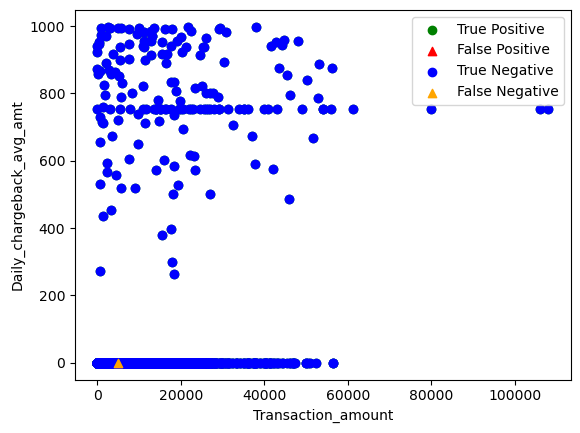

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['Transaction_amount','Daily_chargeback_avg_amt' ]]
y = train_set['isFradulent']

X_test = test_set[['Transaction_amount','Daily_chargeback_avg_amt']]
y_test = test_set['isFradulent']

tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = tree_model.predict(X_test)
print('Results for decision tree on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

plot2FeatureBinaryConfusion(train_set, 'Transaction_amount','Daily_chargeback_avg_amt', 'isFradulent', y_pred)

### Train and evaluate SVC model 

Results for svc on training data
  Default settings
Confusion Matrix
[[2082   10]
 [ 235  133]]
Accuracy is   0.9004065040650406
Precision is  0.9032870698186445
Recall is     0.9004065040650406
F1 is         0.8810215696709827

Results for svc on test data
  Default settings
Confusion Matrix
[[532   3]
 [ 59  21]]
Accuracy is   0.8991869918699187
Precision is  0.8968951618450194
Recall is     0.8991869918699187
F1 is         0.8745519235490209


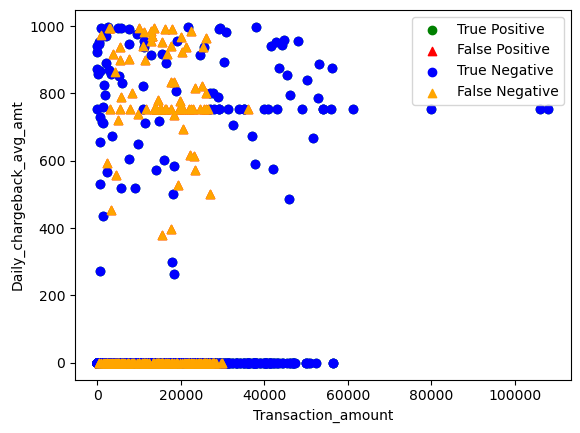

In [71]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['Transaction_amount','Daily_chargeback_avg_amt' ]]
y = train_set['isFradulent']

X_test = test_set[['Transaction_amount','Daily_chargeback_avg_amt']]
y_test = test_set['isFradulent']

svc_model = SVC()
svc_model.fit(X,y)

y_pred = svc_model.predict(X)
print('Results for svc on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = svc_model.predict(X_test)
print('Results for svc on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

plot2FeatureBinaryConfusion(train_set, 'Transaction_amount','Daily_chargeback_avg_amt', 'isFradulent', y_pred)


### Train and evaluate Neural Net model 

C:\Users\amaar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Results for NN on train data
  Default settings
Confusion Matrix
[[ 521 1571]
 [ 300   68]]
Accuracy is   0.2394308943089431
Precision is  0.5458675726455797
Recall is     0.2394308943089431
F1 is         0.31433309465784215

Results for NN on test data
  Default settings
Confusion Matrix
[[130 405]
 [ 60  20]]
Accuracy is   0.24390243902439024
Precision is  0.6013290040021143
Recall is     0.24390243902439024
F1 is         0.3222743132176969


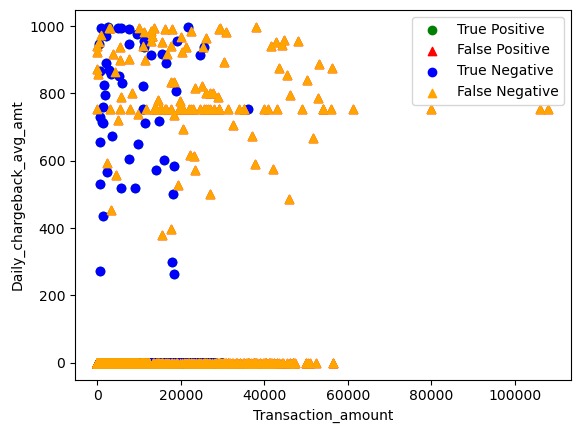

In [69]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['Transaction_amount','Daily_chargeback_avg_amt']]
y = train_set['isFradulent']

X_test = test_set[['Transaction_amount','Daily_chargeback_avg_amt']]
y_test = test_set['isFradulent']

nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10),
                         solver='lbfgs')
nn_model.fit(X,y)

y_pred = nn_model.predict(X)


print('Results for NN on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = nn_model.predict(X_test)
print('Results for NN on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

plot2FeatureBinaryConfusion(train_set, 'Transaction_amount','Daily_chargeback_avg_amt', 'isFradulent', y_pred)


### Use Polynomial Regression

In [74]:
from sklearn.preprocessing import PolynomialFeatures
power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['Transaction_amount']]
y = train_set['Daily_chargeback_avg_amt']
X_poly = poly_process.fit_transform(X)
X_test = test_set[['Transaction_amount']]
y_test = test_set['Daily_chargeback_avg_amt']
X_poly_test = poly_process.fit_transform(X_test)


lr_model = LinearRegression()
lr_model.fit(X_poly,y)
y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))
y_test_pred = lr_model.predict(X_poly_test)


Results for linear regression on training data
Polynomial regression with degree  3
 Default settings
Internal parameters:
 Bias is  29.656794172237745
 Coefficients [-7.76996777e-04  2.10194179e-07 -1.27315170e-12]
 Score 0.08065287394914089
MAE is  97.4747333832246
RMSE is  201.04138666498025
MSE is  40417.639152178104
R^2  0.08065287394914089


In [75]:
from sklearn.preprocessing import PolynomialFeatures
power = 9
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['Transaction_amount']]
y = train_set['Daily_chargeback_avg_amt']
X_poly = poly_process.fit_transform(X)
X_test = test_set[['Transaction_amount']]
y_test = test_set['Daily_chargeback_avg_amt']
X_poly_test = poly_process.fit_transform(X_test)


lr_model = LinearRegression()
lr_model.fit(X_poly,y)
y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly,y))
print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2 ', r2_score(y,y_pred))
y_test_pred = lr_model.predict(X_poly_test)


Results for linear regression on training data
Polynomial regression with degree  9
 Default settings
Internal parameters:
 Bias is  49.96901488281031
 Coefficients [ 2.92332512e-58  2.22195838e-35 -2.04418281e-41  3.53827862e-44
  1.51021686e-39  5.69925963e-35  1.49270084e-30 -3.01302780e-35
  1.51542882e-40]
 Score 0.056017863429499104
MAE is  100.7543232626033
RMSE is  203.71715279046447
MSE is  41500.67834105344
R^2  0.056017863429499104


## Train and evaluate ADA boosted model

In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score



X = train_set[['Transaction_amount','Daily_chargeback_avg_amt' ]]
y = train_set['isFradulent']

X_test = test_set[['Transaction_amount','Daily_chargeback_avg_amt']]
y_test = test_set['isFradulent']

ada_model = AdaBoostClassifier(n_estimators=150)
ada_model.fit(X,y)

y_pred = ada_model.predict(X)

print('Results for ADA on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = ada_model.predict(X_test)
print('Results for ADA on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for ADA on training data
  Default settings
Confusion Matrix
[[2067   25]
 [ 163  205]]
Accuracy is   0.9235772357723577
Precision is  0.9215800794779248
Recall is     0.9235772357723577
F1 is         0.9159793010381604

Results for ADA on test data
  Default settings
Confusion Matrix
[[522  13]
 [ 49  31]]
Accuracy is   0.8991869918699187
Precision is  0.8869153713030522
Recall is     0.8991869918699187
F1 is         0.8861935635631221


## Random

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['Transaction_amount','Daily_chargeback_avg_amt' ]]
y = train_set['isFradulent']

X_test = test_set[['Transaction_amount','Daily_chargeback_avg_amt']]
y_test = test_set['isFradulent']

rf_model = RandomForestClassifier(n_estimators=150)

rf_model.fit(X,y)

y_pred = rf_model.predict(X)

print('Resultsfor Random Forest on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = rf_model.predict(X_test)
print('Results for Random Forest on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Resultsfor Random Forest on training data
  Default settings
Confusion Matrix
[[2092    0]
 [   1  367]]
Accuracy is   0.9995934959349594
Precision is  0.9995936901557262
Recall is     0.9995934959349594
F1 is         0.9995932679683758

Results for Random Forest on test data
  Default settings
Confusion Matrix
[[485  50]
 [ 47  33]]
Accuracy is   0.8422764227642277
Precision is  0.8447840509295572
Recall is     0.8422764227642277
F1 is         0.8435061372364978


### Train and evaluate Voting model 
We build it out of three different kinds of classifiers
One each of DT, SVC and NN


In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier  

# Build the classifiers
vc1_dt = DecisionTreeClassifier()
vc2_svm = SVC()
vc3_nn = MLPClassifier(hidden_layer_sizes=(50, 25, 10),
 solver='lbfgs')

# Bundle into a list with names
vcList = [('DT',vc1_dt),
 ('SVM',vc2_svm),
 ('NN',vc3_nn)]


X = train_set[['Transaction_amount','Daily_chargeback_avg_amt' ]]
y = train_set['isFradulent']

X_test = test_set[['Transaction_amount','Daily_chargeback_avg_amt']]
y_test = test_set['isFradulent']


vote_model = VotingClassifier(vcList)
vote_model.fit(X,y)

y_pred = vote_model.predict(X)

print('Results for Voting Ensemble on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = vote_model.predict(X_test)
print('Results for Voting Ensemble on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

C:\Users\amaar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Results for Voting Ensemble on training data
  Default settings
Confusion Matrix
[[2092    0]
 [ 235  133]]
Accuracy is   0.9044715447154471
Precision is  0.9141188102899507
Recall is     0.9044715447154471
F1 is         0.8846072419486913

Results for Voting Ensemble on test data
  Default settings
Confusion Matrix
[[533   2]
 [ 63  17]]
Accuracy is   0.8943089430894309
Precision is  0.8943527381229306
Recall is     0.8943089430894309
F1 is         0.8645977577853103


# Results
Basic results for our classification model to predict arm on the data set

| Model | Training Features | Acc Train | F1 Train |Acc Test | F1 Test |
|:---|:---|:---|:---|:---|:---|
|Decision Tree|A,B|100.0|100.0|71.62 | 71.63 |
|SVC|A,B|71.58|71.58|70.5|70.42|
|MLP|A,B layers (50,25,10) lbfgs|80.06|80.13|77.87|77.91


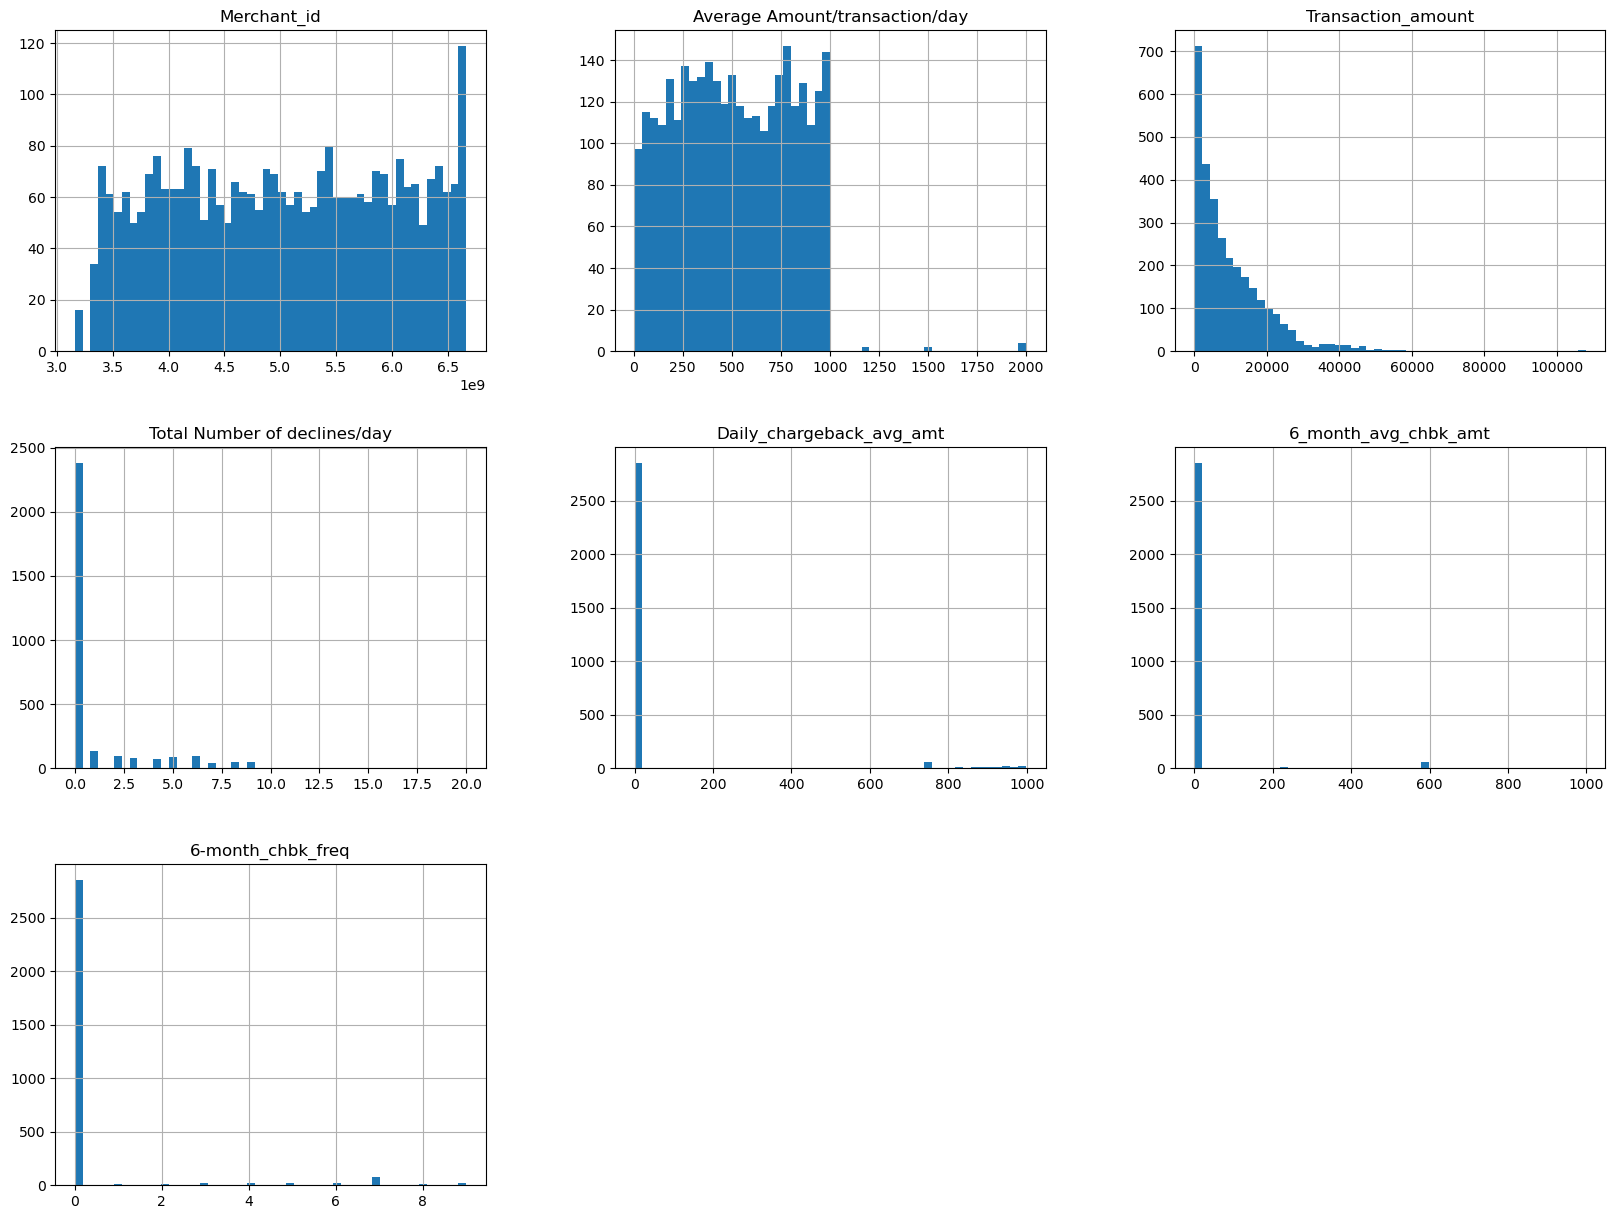

In [149]:
df.hist(bins=50, figsize=(20,15))
plt.show()


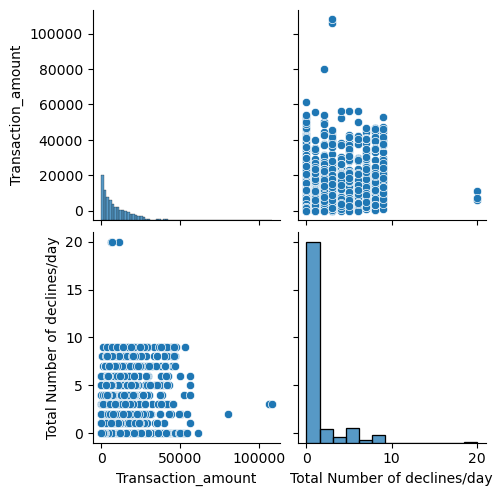

In [150]:
sns.pairplot(df[['Transaction_amount','Total Number of declines/day','isHighRiskCountry','isFradulent']])

In [131]:
dfCategoricas = df.select_dtypes(include=['object'])

for c in dfCategoricas.columns:
    print("Categoría",c,":\n",dfCategoricas[c].unique())
    print(dfCategoricas[c].value_counts(),"\n")

Categoría Is declined :
 ['N' 'Y']
N    3018
Y      57
Name: Is declined, dtype: int64 

Categoría isForeignTransaction :
 ['Y' 'N']
N    2369
Y     706
Name: isForeignTransaction, dtype: int64 

Categoría isHighRiskCountry :
 ['Y' 'N']
N    2870
Y     205
Name: isHighRiskCountry, dtype: int64 

Categoría isFradulent :
 ['Y' 'N']
N    2627
Y     448
Name: isFradulent, dtype: int64 



Matrix correlation


C:\Users\amaar\AppData\Local\Temp\ipykernel_7532\3783835605.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm',linewidths=.5,fmt='.2f',annot=True);


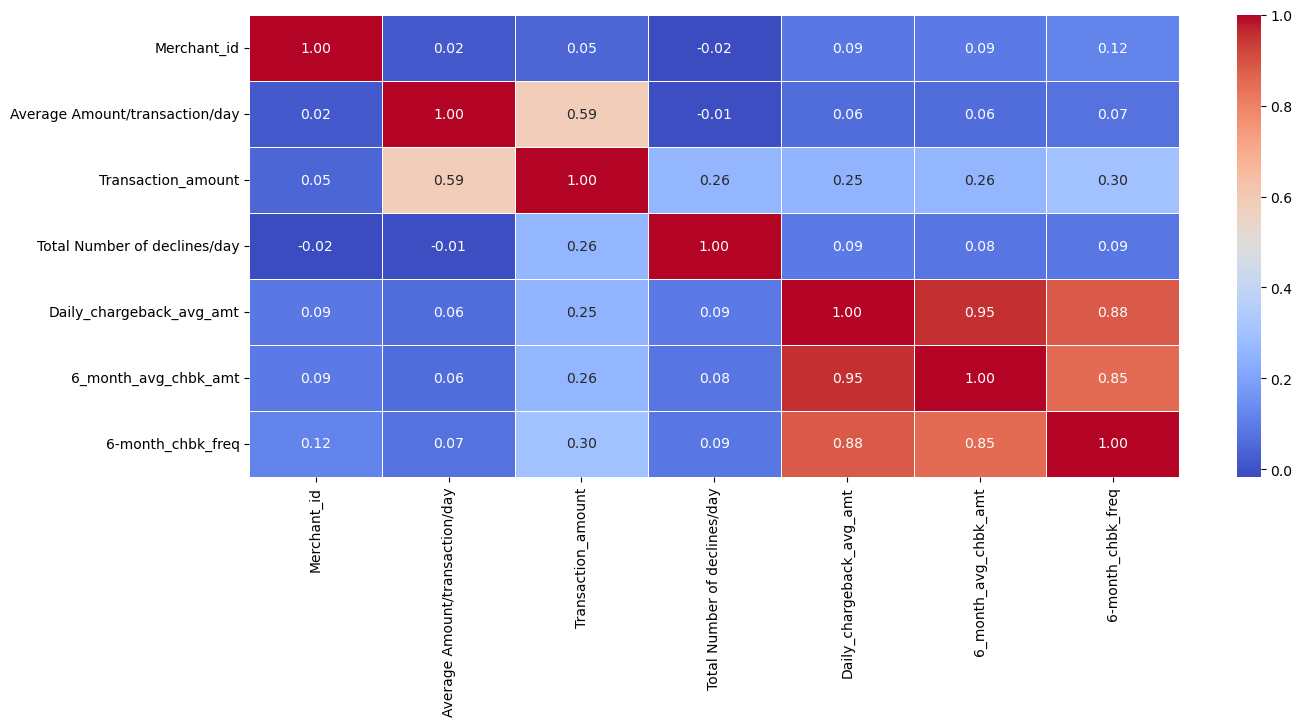

In [154]:
print('Matrix correlation')
plt.rcParams['figure.figsize']=(15,6)
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=.5,fmt='.2f',annot=True);

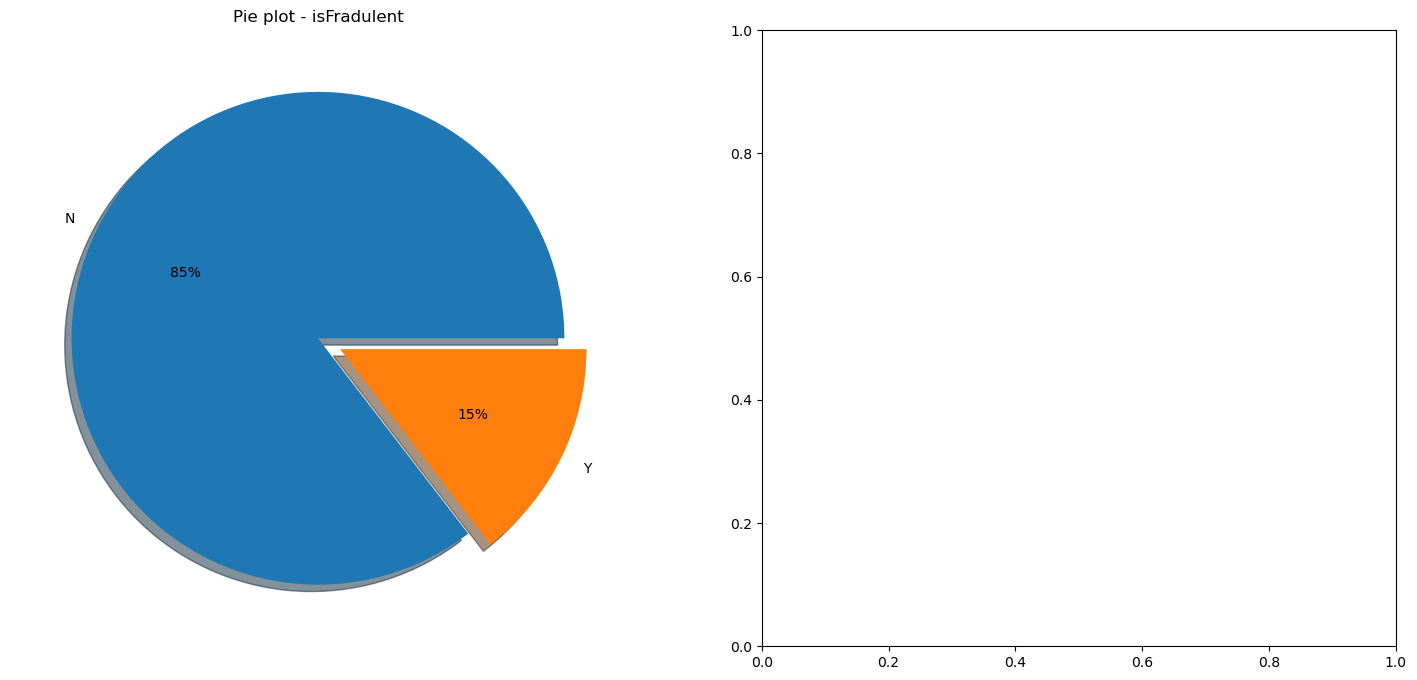

In [140]:
f, ax = plt.subplots(1,2, figsize=(18, 8))

df['isFradulent'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - isFradulent')
ax[0].set_ylabel('')

plt.show()

In [141]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,test_size=0.25, random_state=2020)


In [142]:
df_test['isFradulent']= df_test['isFradulent'].replace('N',0)
df_test['isFradulent']=df_test['isFradulent'].replace('Y',1)

In [143]:
df_train['Average Amount/transaction/day'].describe()

count    2306.000000
mean      515.381265
std       292.414247
min         4.011527
25%       265.679271
50%       506.754489
75%       768.579965
max      2000.000000
Name: Average Amount/transaction/day, dtype: float64

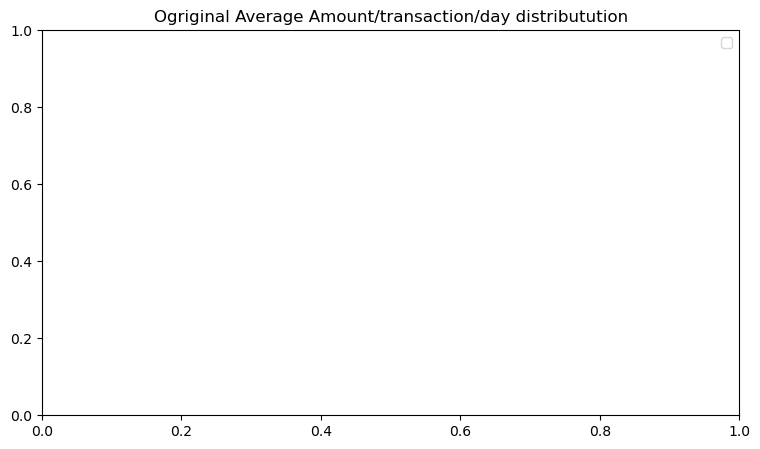

In [144]:
fig,ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['isFradulent']==0]['Average Amount/transaction/day'],ax=ax)
sns.kdeplot(df_train[df_train['isFradulent']==1]['Average Amount/transaction/day'],ax=ax)
plt.legend(['isFradulent==0','isFradulent==1'])
plt.title('Ogriginal Average Amount/transaction/day distributution')
plt.show()

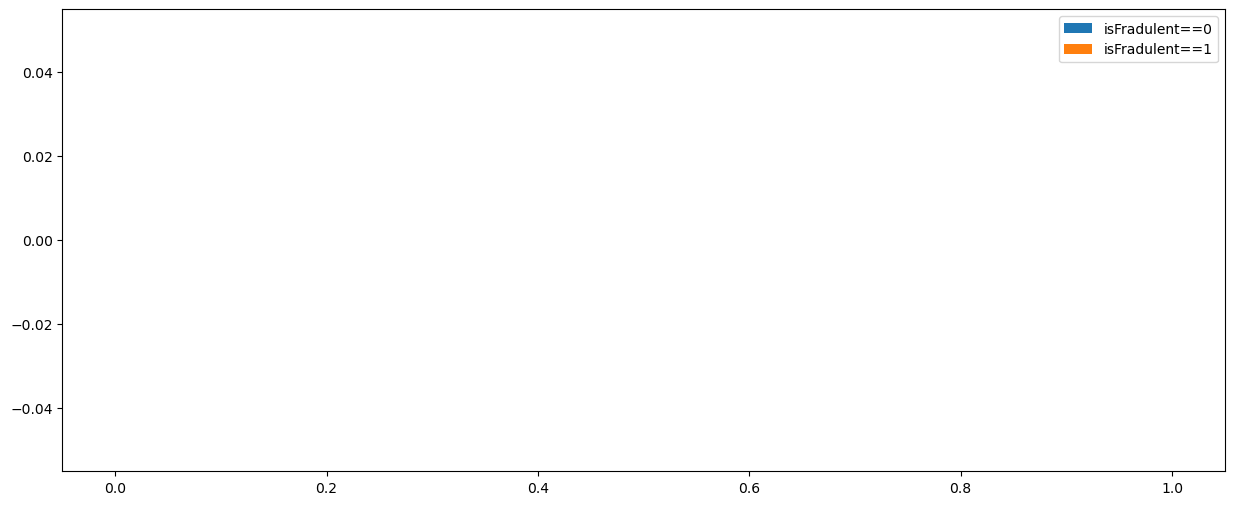

In [138]:
plt.hist(df_train[df_train['isFradulent']==0]['Average Amount/transaction/day'])
plt.hist(df_train[df_train['isFradulent']==1]['Average Amount/transaction/day'])
plt.legend(['isFradulent==0','isFradulent==1'])
plt.show()

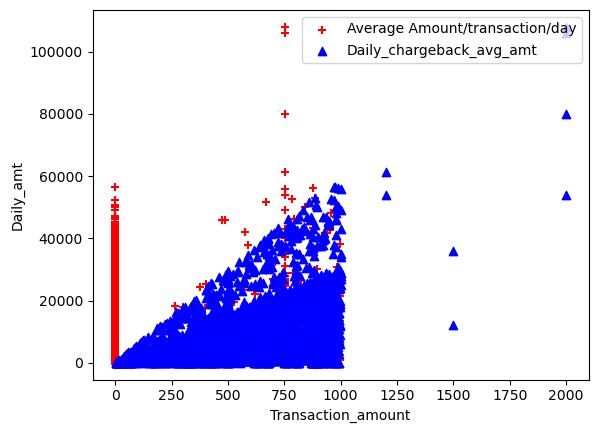

In [80]:
import matplotlib.pyplot as plt
Daily_amt = np.ma.masked_where(df['isFradulent']==0, 
                     df['Daily_chargeback_avg_amt'])
Daily = np.ma.masked_where(df['isFradulent']==1, 
                     df['Average Amount/transaction/day'])

Transaction_amount = df['Transaction_amount']
plt.scatter(Daily_amt, Transaction_amount, c='red', marker='+')
plt.scatter(Daily, Transaction_amount, c='blue', marker='^')

plt.xlabel('Transaction_amount')
plt.ylabel('Daily_amt')
plt.legend(['Average Amount/transaction/day', 'Daily_chargeback_avg_amt'])
plt.show()

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['A','B' ]]
y = train_set['Class']

X_test = test_set[['A','B']]
y_test = test_set['Class']

rf_model = RandomForestClassifier(n_estimators=150)

rf_model.fit(X,y)

y_pred = rf_model.predict(X)

print('Resultsfor Random Forest on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = rf_model.predict(X_test)
print('Results for Random Forest on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

KeyError: "None of [Index(['A', 'B'], dtype='object')] are in the [columns]"